In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import (
    mean_absolute_percentage_error,
    mean_squared_error
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

* Primeiro geramos dados não lineares, com base em uma equação polinomial quadrática simples:

* --> Equação Quadrática Simples: y = ax² + bx + c

In [2]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

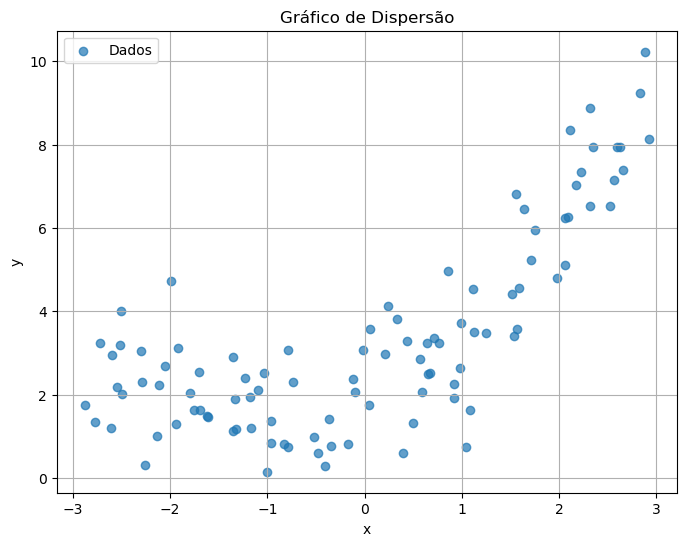

In [3]:
# Gerar o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Dados', alpha=0.7)
plt.title('Gráfico de Dispersão')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

* Usaremos a classe PolynomialFeatures do Scikit-Learn para trasnformar nossos dados de treinamento, adicionando o quadrado do polinômio de 2° grau de cada característica no conjunto de treinamento como uma nova característica:

In [4]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(x)

In [5]:
print(f"x[0]: {x[0]}")
print(f"X_poly[0]: {X_poly[0]}")

x[0]: [-2.77086838]
X_poly[0]: [-2.77086838  7.67771156]


* Agora X_poly tem a característica original mais o quadrado de dessa característica. Então você pode ajustar um modelo LinearRegression a esses dados de treinamento alargados:

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.99041199]), array([[1.0116357 , 0.48744602]]))

* Pipeline completa de implementação do modelo de Regressão Polinomial:

Grau 1: R² = 0.5560
Grau 2: R² = 0.9626
Grau 3: R² = 0.9626
Grau 4: R² = 0.9625
Grau 5: R² = 0.9630

Melhor grau: 5 com R² = 0.9630
=== COMPARAÇÃO TREINO/TESTE ===
TREINO:
  MAE = 0.3551, RMSE = 0.4511
  R² = 0.9569, MAPE = 16.69%

TESTE:
  MAE = 0.2768, RMSE = 0.3949
  R² = 0.9630, MAPE = 7.97%

Diferença R² (Treino - Teste): -0.0061
✅ Modelo generalizando bem!

=== MODELO AJUSTADO ===
Equação polinomial grau 5:
y = 3.3311 + 1.5981*x + 1.4426*x^2 + 0.2716*x^3 + -0.0153*x^4 + -0.2062*x^5


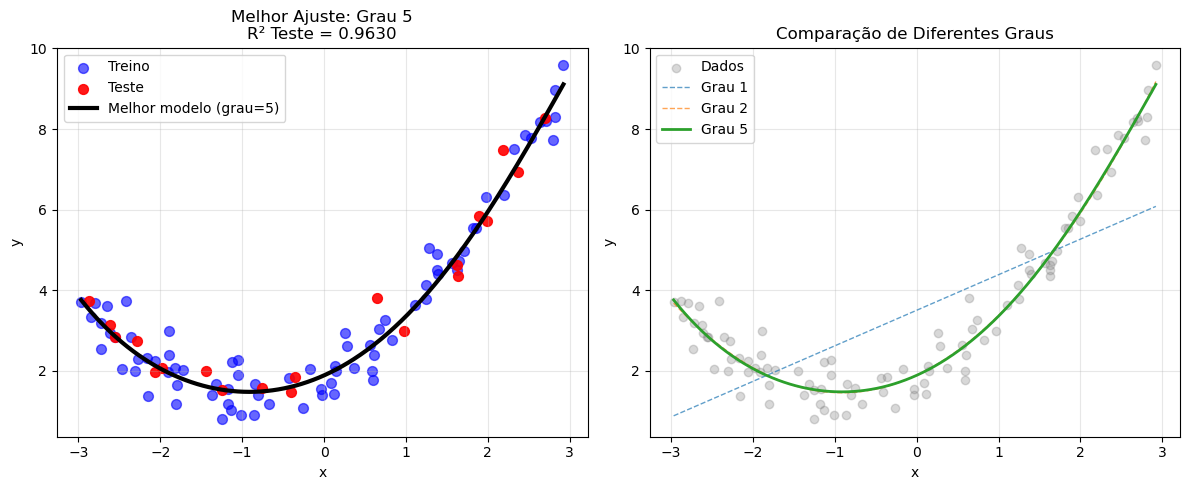

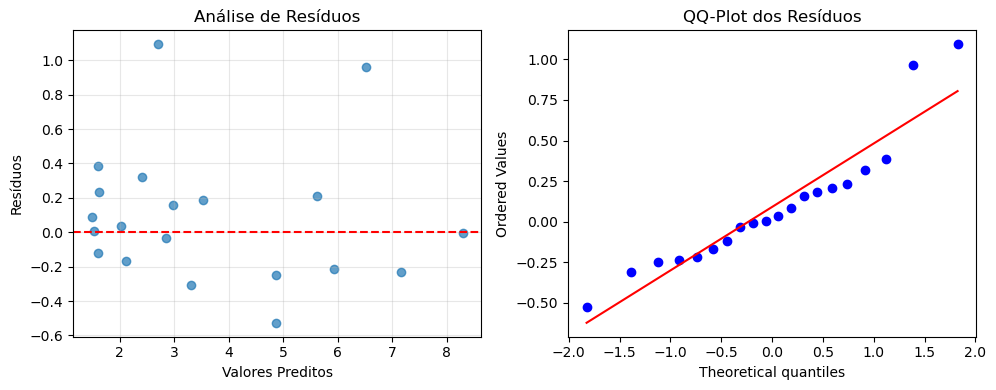

✅ Implementação completa e profissional!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from scipy import stats

# 1) Dados - MANTIDO PERFEITO
np.random.seed(42)
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1) * 0.5

# 2) Divisão treino/teste - MANTIDO PERFEITO
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 3) Pipeline - MELHORIA: Adicionar validação do grau
degrees_to_try = [1, 2, 3, 4, 5]  # Testar múltiplos graus

best_score = -np.inf
best_degree = None
best_pipeline = None

for degree in degrees_to_try:
    pipeline = Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("scaler", StandardScaler()),
        ("reg", Ridge(alpha=1.0))  # Alpha pode ser tunado também
    ])
    
    pipeline.fit(X_train, y_train.ravel())
    y_pred_test = pipeline.predict(X_test)
    score = r2_score(y_test, y_pred_test)
    
    print(f"Grau {degree}: R² = {score:.4f}")
    
    if score > best_score:
        best_score = score
        best_degree = degree
        best_pipeline = pipeline

print(f"\nMelhor grau: {best_degree} com R² = {best_score:.4f}")

# 4) Usar o melhor modelo
pipeline = best_pipeline
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# 5) Métricas detalhadas (sem função)
print("=== COMPARAÇÃO TREINO/TESTE ===")

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train) * 100

print("TREINO:")
print(f"  MAE = {mae_train:.4f}, RMSE = {rmse_train:.4f}")
print(f"  R² = {r2_train:.4f}, MAPE = {mape_train:.2f}%\n")

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test) * 100

print("TESTE:")
print(f"  MAE = {mae_test:.4f}, RMSE = {rmse_test:.4f}")
print(f"  R² = {r2_test:.4f}, MAPE = {mape_test:.2f}%\n")

# 6) Análise de overfitting
diferenca_r2 = r2_train - r2_test
print(f"Diferença R² (Treino - Teste): {diferenca_r2:.4f}")
if diferenca_r2 > 0.1:
    print("⚠️  Possível overfitting!")
elif diferenca_r2 < 0.05:
    print("✅ Modelo generalizando bem!")
else:
    print("📊 Modelo com generalização moderada")

# 7) Coeficientes
poly = pipeline.named_steps["poly"]
reg = pipeline.named_steps["reg"]
feature_names = poly.get_feature_names_out(["x"])

print("\n=== MODELO AJUSTADO ===")
print(f"Equação polinomial grau {best_degree}:")
equation = f"y = {reg.intercept_:.4f}"
for name, coef in zip(feature_names, reg.coef_):
    if abs(coef) > 0.001:  # Mostrar apenas coeficientes significativos
        equation += f" + {coef:.4f}*{name}"
print(equation)

# 8) Plot melhorado
plt.figure(figsize=(12, 5))

# Subplot 1: Melhor modelo
plt.subplot(1, 2, 1)
x_grid = np.linspace(x.min(), x.max(), 500).reshape(-1, 1)
y_grid_pred = pipeline.predict(x_grid)

plt.scatter(X_train, y_train, color="blue", alpha=0.6, label="Treino", s=50)
plt.scatter(X_test, y_test, color="red", alpha=0.9, label="Teste", s=50)
plt.plot(x_grid, y_grid_pred, color="black", linewidth=3, 
         label=f"Melhor modelo (grau={best_degree})")
plt.title(f"Melhor Ajuste: Grau {best_degree}\nR² Teste = {best_score:.4f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)

# Subplot 2: Comparação de graus
plt.subplot(1, 2, 2)
plt.scatter(x, y, alpha=0.3, label="Dados", color="gray")

for degree in [1, 2, 5]:
    temp_pipe = Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("scaler", StandardScaler()),
        ("reg", Ridge(alpha=1.0))
    ])
    temp_pipe.fit(X_train, y_train.ravel())
    y_grid_temp = temp_pipe.predict(x_grid)
    
    linestyle = "--" if degree != best_degree else "-"
    linewidth = 1 if degree != best_degree else 2
    alpha = 0.7 if degree != best_degree else 1.0
    
    plt.plot(x_grid, y_grid_temp, linestyle=linestyle, linewidth=linewidth,
             alpha=alpha, label=f"Grau {degree}")

plt.title("Comparação de Diferentes Graus")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 9) Análise de resíduos
plt.figure(figsize=(10, 4))

# Resíduos vs preditos
plt.subplot(1, 2, 1)
residuos_teste = y_test.flatten() - y_pred_test
plt.scatter(y_pred_test, residuos_teste, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")
plt.title("Análise de Resíduos")
plt.grid(alpha=0.3)

# QQ-Plot
plt.subplot(1, 2, 2)
stats.probplot(residuos_teste, dist="norm", plot=plt)
plt.title("QQ-Plot dos Resíduos")

plt.tight_layout()
plt.show()

print("✅ Implementação completa e profissional!")
